In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
text1

<Text: Moby Dick by Herman Melville 1851>

# search text

A concordance view shows every occurrence of a given word

In [5]:
# example using text 1
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


Find word similar to monstrous

In [6]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


# Frequency Distribution
It tells the frequency of each vocabulary and how the total number of word tokens in the text are distributed across the vocabulary items. 

In [10]:
# generate a dictionary while the key is the word and the value is the number of time this word is appearing in the text.
fdist1 = FreqDist(text1)
fdist1['whale']

906

The frequency dictionary is sorted by the number of occurrence, so we could plot top 50 words appering in the book

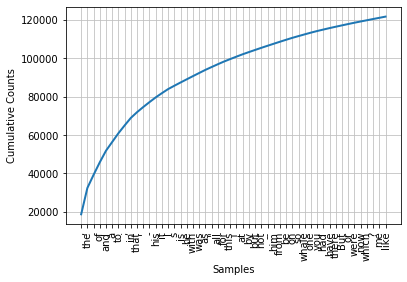

In [13]:
fdist1.plot(50, cumulative=True)

In [14]:
# To select the word, we first need to convert text into set
text_set = set(text1)
# extract long words
long_words = [w for w in text_set if len(w) > 15]
long_words

['CIRCUMNAVIGATION',
 'responsibilities',
 'characteristically',
 'indiscriminately',
 'cannibalistically',
 'circumnavigation',
 'uncompromisedness',
 'simultaneousness',
 'comprehensiveness',
 'supernaturalness',
 'circumnavigations',
 'indispensableness',
 'hermaphroditical',
 'uninterpenetratingly',
 'superstitiousness',
 'irresistibleness',
 'uncomfortableness',
 'preternaturalness',
 'subterraneousness',
 'circumnavigating',
 'undiscriminating',
 'apprehensiveness',
 'physiognomically',
 'Physiognomically']

In [15]:
# combine frequency together we get all words are longer than 7 characters and occur more than 7 times
fdist5 = FreqDist(text5)
sorted([w for w in set(text5) if len(w) > 7 and fdist5[w] > 7])

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

# collocatiuns and bigrams

- a collocation is a sequence of words that usually occur together (e.g red wine)

 To handle collocations, we could extracting from a text list of word pairs, which is called bigrams

In [19]:
for pair in bigrams(['more', 'is', 'said', 'than', 'done']): 
    print(pair)

('more', 'is')
('is', 'said')
('said', 'than')
('than', 'done')


Collocations can be treated as frequent bigrams, we can use collocations() function to get most collocations()

In [23]:
text8.collocation_list()

['would like',
 'medium build',
 'social drinker',
 'quiet nights',
 'non smoker',
 'long term',
 'age open',
 'Would like',
 'easy going',
 'financially secure',
 'fun times',
 'similar interests',
 'Age open',
 'weekends away',
 'poss rship',
 'well presented',
 'never married',
 'single mum',
 'permanent relationship',
 'slim build']

# accessing text corpora and lexical resources

Wordlist Corpora: it could be used to find unusual or misspelled words in a text corpus.

In [25]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    miss_spell = text_vocab.difference(english_vocab)
    return miss_spell

Stopwords: store the high_frequency words such as the, to and also etc

In [26]:
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [27]:
# compute what fraction of words in a text are not in the stopwords list
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content)/len(text)

# Accessing Text from the web and from Disk

Electronic Books

In [42]:
from urllib.request import urlopen
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
raw = urlopen(url).read()

In [33]:
len(raw)

1201520

In [34]:
raw[:75]

b'\xef\xbb\xbfThe Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsk'

Breaking up the string into words and punctuation is called tokenization and it produces a list of words and punctuation

In [38]:
tokens = nltk.word_tokenize(str(raw))

In [39]:
tokens[: 15]

["b'\\xef\\xbb\\xbfThe",
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by',
 'Fyodor',
 'Dostoevsky\\r\\n\\r\\nThis',
 'eBook',
 'is',
 'for']

Dealing with HTML

In [44]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = urlopen(url).read()

In [45]:
html[:60]

b'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

nltk.clean_html() takes an HTML string and returns raw text, then we can tokenize the raw text file

In [48]:
from bs4 import BeautifulSoup

In [50]:
raw = BeautifulSoup(html).get_text()
tokens = nltk.word_tokenize(raw)
tokens[:10]

['BBC', 'NEWS', '|', 'Health', '|', 'Blondes', "'to", 'die', 'out', 'in']

In [52]:
# convert token into text
text = nltk.Text(tokens)
text.concordance('gene')

Displaying 7 of 7 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin
er's Polio campaign launched in Iraq Gene defect explains high blood pressure 
er's Polio campaign launched in Iraq Gene defect explains high blood pressure 


The NLP pipeline

First, convert HTML or URL into ASCII by following code

In [ ]:
html = urlopen(url).read()
raw = nltk.clean_html(html)
raw = raw[750: 23506]

After we got raw text file, convert ASCII into text file

In [ ]:
# split raw text into token
tokens = nltk.wordpunct_tokenize(raw)
tokens = tokens[20: 1834]
text = nltk.Text(token)

In [ ]:
The final step is to normalize the words and build vocabulary
words = [w.lower() for w in text]
vocab = sorted(set(words))

# Regular Expression for Detecting Word Patterns

To use regular expression in python, import re library

<<ed$>> can be used to find word ending with ed. 

re.search(p, s) can be used to check whether pattern p can be found inside s.

In [56]:
import re
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]
[w for w in wordlist if re.search('ed$', w)][:10]

['abaissed',
 'abandoned',
 'abased',
 'abashed',
 'abatised',
 'abed',
 'aborted',
 'abridged',
 'abscessed',
 'absconded']

The . symbol matches any single character. 

For example '^..j..t..$'

In [57]:
[w for w in wordlist if re.search('^..j..t..$', w)]

['abjectly',
 'adjuster',
 'dejected',
 'dejectly',
 'injector',
 'majestic',
 'objectee',
 'objector',
 'rejecter',
 'rejector',
 'unjilted',
 'unjolted',
 'unjustly']

The ? symbol specifies that the previous character is optional. <<^e-?mail$>> will match both email and e-mail.

In [59]:
[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)]

['gold', 'golf', 'hold', 'hole']

The first part of the expression matches the start of a word followed by g, h or i.  The second part of the expression matches m, n or o etc

The + operator means one or more instance of preceding item which could be applied on an individual character like m,
a set like [fed], or a range like [d-f].

In [60]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^m+i+n+e+$', w)]

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

The * operator means "zero or more instances of the preceding item"

In [62]:
[w for w in chat_words if re.search('^[ha]+$', w)][:10]

['a',
 'aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'ah',
 'ahah',
 'ahahah',
 'ahh',
 'ahhahahaha',
 'ahhh',
 'ahhhh']

In [63]:
[w for w in chat_words if re.search('^(ha)+$', w)][:10]

['ha',
 'haha',
 'hahaha',
 'hahahaha',
 'hahahahahaha',
 'hahahahahahaha',
 'hahahahahahahahahahahahahahahaha']

The ^ operator means not when it appears as the first character inside square brackets.

^[aeiouAEIOU] matches any character other than a vowel.

In [64]:
wsj = sorted(set(nltk.corpus.treebank.words()))

regular expression to find number

In [66]:
[w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)][:10]

['0.0085', '0.05', '0.1', '0.16', '0.2', '0.25', '0.28', '0.3', '0.4', '0.5']

word ends with ed or ing

In [68]:
[w for w in wsj if re.search('(ed|ing)', w)][:10]

['62%-owned',
 'Absorbed',
 'According',
 'Adopting',
 'Advanced',
 'Advancing',
 'Alfred',
 'Allied',
 'Annualized',
 'Anything']

### Regular expression application

The re.findall() can find all matches of the given regular expression.

In [70]:
word = 'supercalifragilisticexpialidocious'
re.findall(r'[aeiou]', word)

['u',
 'e',
 'a',
 'i',
 'a',
 'i',
 'i',
 'i',
 'e',
 'i',
 'a',
 'i',
 'o',
 'i',
 'o',
 'u']

In [ ]:
Find all seqeuence